In [1]:
import numpy as np
import pulp as plp
import random
import matplotlib.pyplot as plt
import time
import networkx as nx

In [2]:
import ipynb.fs.full.Combined_Code_2 as kg

52 90


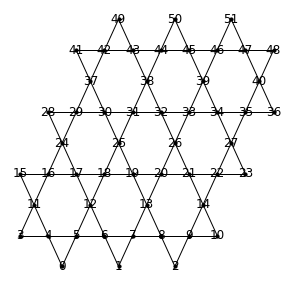

In [3]:
N=3

G,points = kg.Create_Kagome_Graph(N,N,p=0.0)

print(len(G.nodes()),len(G.edges()))

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,points,node_size=10,node_color="black",with_labels=True)

In [121]:
def Create_Triangular_Graph(n):
    p=[]
    for j in range(1,n+1):
        for i in range(1,n+1):
            p.append((j%2 + 2*i - 3, 2*j-2))
    
    points = p
    N = len(points)
    points = sorted(points,key=lambda l:l[1])
    ############################################################################
    G = nx.Graph()
    G.add_nodes_from(points)
    
    dic={}  
    for n,(x,y) in zip(G.nodes(),points):
        dic[n] = (x,y)
    #############################################################################
    for a,b in G.nodes():
        if (a+1,b+2) in G.nodes():
            G.add_edge((a,b),(a+1,b+2))
        if (a-1,b+2) in G.nodes():
            G.add_edge((a,b),(a-1,b+2))
        if (a+2,b) in G.nodes():
            G.add_edge((a,b),(a+2,b))
    #####################################################################################
    return G,dic

In [360]:
def Rewire_Grid1(G):

    nukem=[]
    addem=[]

    x = [i[0] for i in G.nodes()]
    y = [i[1] for i in G.nodes()]

    xmaks=max(x)
    ymaks=max(y)
    
    a = (random.randint(0,xmaks),random.randint(0,ymaks))
    b = (random.randint(0,xmaks),random.randint(0,ymaks))
    
    while ((a,b) not in G.edges()):
        a = (random.randint(0,xmaks),random.randint(0,ymaks))
        b = (random.randint(0,xmaks),random.randint(0,ymaks))

    nukem.append((a,b))

    n1 = (random.randint(0,xmaks),random.randint(0,ymaks))
    n2 = (random.randint(0,xmaks),random.randint(0,ymaks))

    while ((n1,n2) in G.edges()) or ((n1,n2)==(a,b) or (n1,n2)==(b,a)) or ((n1,n2) in addem or (n2,n1) in addem) or (n1 not in G.nodes()) or (n2 not in G.nodes()):# or ((n1,n2)==(a,b) or (n1,n2)==(b,a)) or ((n1,n2) in addem):

            n1 = (random.randint(0,xmaks),random.randint(0,ymaks))
            n2 = (random.randint(0,xmaks),random.randint(0,ymaks))

    addem.append((n1,n2))
    
    #print(len(G.edges()))

    G.remove_edges_from(nukem)
    G.add_edges_from(addem)
    
    #print("remove",nukem,"add",addem)
    
    #print(len(G.edges()))

    return G

In [361]:
def full_plot(G,pos,n=False,e=False):
    
    edge_colors=[]
    node_colors=[]
    if e==True:
        edge_colors=[]
        for a,b,d in G.edges.data():
            if d["weight"]==1:
                edge_colors.append("green")
            else:
                edge_colors.append("red")
    
    if n==True:
        for n,d in G.nodes.data():
            node_colors.append(d["color"])
        
    #print(len(node_colors),len(G.nodes()))
    
    #pos = {k: v for k,v in zip(G.nodes(), points)}
    fig, ax = plt.subplots(figsize=(12,12))
    nx.draw(G,pos,node_size=100,edge_color=edge_colors,node_color=node_colors,with_labels = True)

In [362]:
G,points = Create_Triangular_Graph(10)

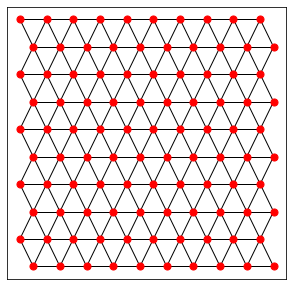

In [363]:
fig, ax = plt.subplots(figsize=(5,5))
nx.draw_networkx(G,pos=points,node_size=50,with_labels=False,node_color="red")

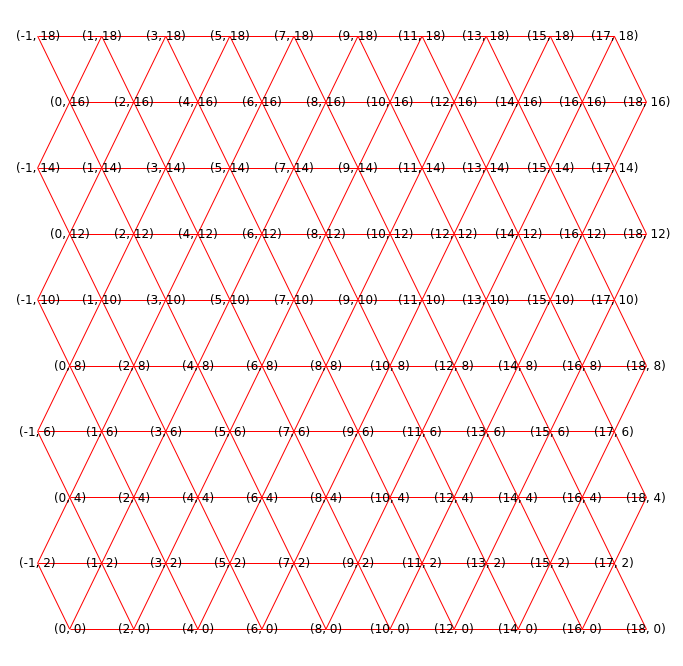

In [366]:
G = kg.Add_Weights(G,1.0)
full_plot(G,points,e=True)

In [367]:
def frustration_count(G):
    
    s = 0
    for n1,n2,val in G.edges.data():
        if G.nodes[n1]['color']==G.nodes[n2]['color'] and val['weight']==-1:
            s+=1
    return s

261
81.0
81


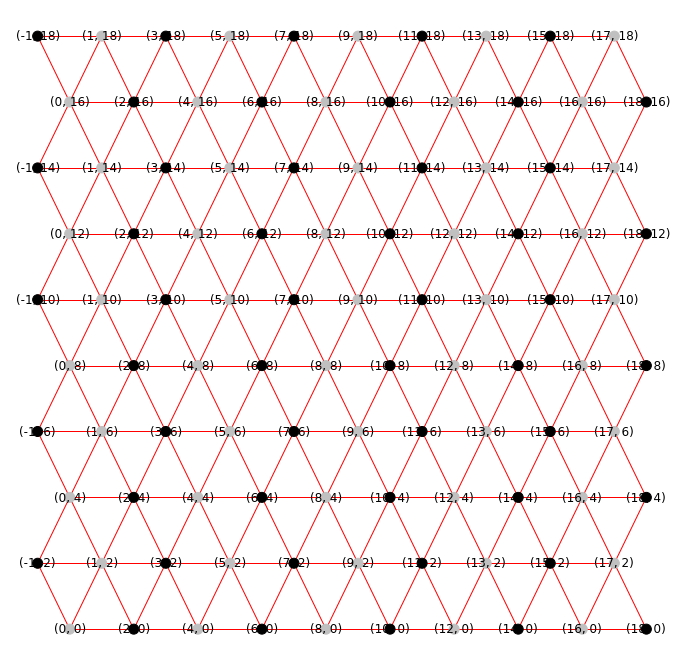

In [368]:
G,points = Create_Triangular_Graph(10)
G = kg.Add_Weights(G,1.0)
print(len(G.edges()))
signed_matrix0 = nx.to_numpy_matrix(G0)
graphs, weights, signed_matrices = kg.Create_Data([signed_matrix0])
frustration_index,variables = kg.Model(graphs, weights, signed_matrices)

print(frustration_index)

G = kg.color_nodes(G,variables)
full_plot(G,points,e=True,n=True)
print(frustration_count(G))

261
85


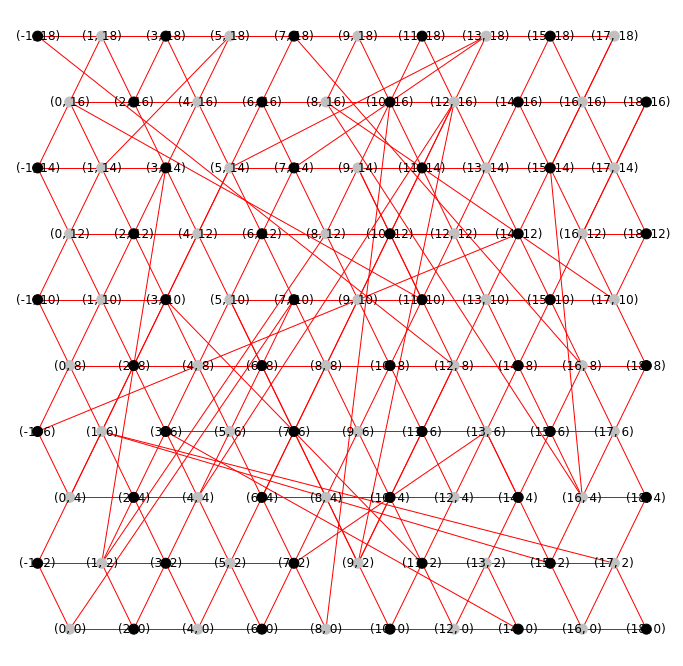

In [421]:
G = nx.algorithms.double_edge_swap(G, nswap=1)

print(len(G.edges()))
G = kg.Add_Weights(G,1.0)
full_plot(G,points,e=True,n=True)
print(frustration_count(G))

In [402]:
def Quench2():

    p=0.0

    total=[]
    frustrations=[]

    for k in range(10):
        print(k)
        G0,points = Create_Kagome_Graph(20)

        #G0 = Rewire_Grid1(G0,0.0)

        G0 = kg.Add_Weights(G0,1.0)

        signed_matrix0 = nx.to_numpy_matrix(G0)
        graphs, weights, signed_matrices = kg.Create_Data([signed_matrix0])
        frustration_index,variables = kg.Model(graphs, weights, signed_matrices)

        frustrations.append(frustration_index)

        G0 = kg.color_nodes(G0,variables)

        #full_plot(G0,points,e=True,n=True)
        
        res=[]
        
        H = G0
        #for i in range(0,int(len(G.edges)/2)):
        for i in range(0,2000):

            H = nx.algorithms.double_edge_swap(H, nswap=1)#int(84/2))
            #H = Rewire_Grid1(H)
            
            H = kg.Add_Weights(H,1.0)
            H = kg.color_nodes(H,variables)

            #full_plot(H,points,e=True,n=True)

            res.append(kg.frustration_count(H))

        total.append(res)
    total = np.array(total)
    final = []
    for i in range(0,len(total[0])):
        final.append((np.mean(total[:,i]),np.std(total[:,i])))
        
    return final,total

In [403]:
results20,total20 = Quench2()

0
1
2
3
4
5
6
7
8
9


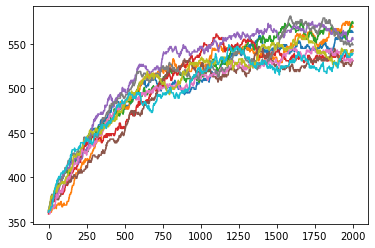

In [404]:
fig, ax = plt.subplots()#figsize=[8,8])
for i in range(len(total20)):
    ax.plot([x for x in range(len(total20[i]))], total20[i])
plt.show()

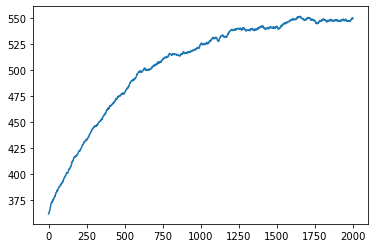

In [406]:
fig, ax = plt.subplots()#figsize=[8,8])
ax = ax.errorbar([p for p in range(0,2000)], [i for i,j in results20])#,[j for i,j in results])
plt.show()